**Time-Series Forecasting - Transformer vs. LSTM Benchmark**

**Author:** Rhishi Kumar Ayyappan

**Objective:** To implement a Transformer model to forecast multivariate time-series data (Jena Climate dataset). The project's goal is to predict future temperature and quantitatively benchmark the advanced Transformer architecture against a traditional LSTM baseline. The final analysis identifies the model's predictive accuracy, performance trade-offs, and failure points (worst-case scenarios).

--- Section 1: Setup and Imports ---
TensorFlow Version: 2.19.0
Imports complete.


--- Section 2: Constants and Data Loading ---
Loading data with Pandas...
Total hourly records: 70091
Converting dataset to NumPy...
Data shape (records, features): (70091, 6)


--- Section 3: Preprocessing & Windowing ---
Training samples: 49063
Validation samples: 10514
Test samples: 10514
Creating windowed datasets...
Train inputs shape: (48980, 72, 6) (Samples, InputWindow, Features)
Train targets shape: (48980, 12) (Samples, OutputWindow)
Validation inputs shape: (10431, 72, 6)
Test inputs shape: (10431, 72, 6)
tf.data pipelines built successfully.


--- Section 4: Training Baseline LSTM Model ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,388 (21.05 KB)

 Trainable params: 5,388 (21.05 KB)

 Non-trainable params: 0 (0.00 B)

Training LSTM baseline...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5040 - val_loss: 0.2217
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2081 - val_loss: 0.1953
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1854 - val_loss: 0.1908
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1773 - val_loss: 0.1816
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1702 - val_loss: 0.1783
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1667 - val_loss: 0.1733
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1639 - val_loss: 0.1739
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1609 - val_loss: 0.1722
Epoch 9/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1602 - val_loss: 0.1701
Epoch 10/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1581 - val_loss: 0.1712
Evaluating LSTM baseline on test set...
Baseline LSTM Test MAE: 0.1641


--- Section 5: Transformer Model Archite

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 72, 6)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_1          │ (None, 72, 64)         │           448 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_2     │ (None, 72, 64)         │        83,200 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_3     │ (None, 72, 64)         │        83,200 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,788 (671.05 KB)

 Trainable params: 171,788 (671.05 KB)

 Non-trainable params: 0 (0.00 B)



--- Section 6: Training Transformer Model ---
Starting training...
Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5686
Epoch 1: val_loss improved from inf to 0.27103, saving model to best_transformer_model.weights.h5
383/383 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - loss: 0.5683 - val_loss: 0.2710
Epoch 2/20
381/383 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2892
Epoch 2: val_loss improved from 0.27103 to 0.22286, saving model to best_transformer_model.weights.h5
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.2891 - val_loss: 0.2229
Epoch 3/20
381/383 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2546
Epoch 3: val_loss improved from 0.22286 to 0.21816, saving model to best_transformer_model.weights.h5
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.2545 - val_loss: 0.2182
Epoch 4/20
381/383 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2434
Epoch 4: val_loss improved from 0.21816 to 0.21231, saving model to best_transformer_model.weights.h5
383/383 ━━━━━━━━━━━━━━━━━━

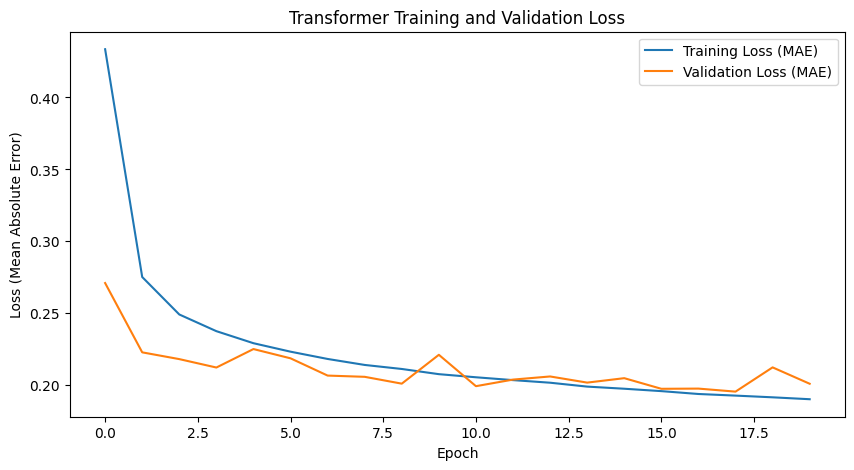

Generating 3 random forecast plots to show robustness...
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


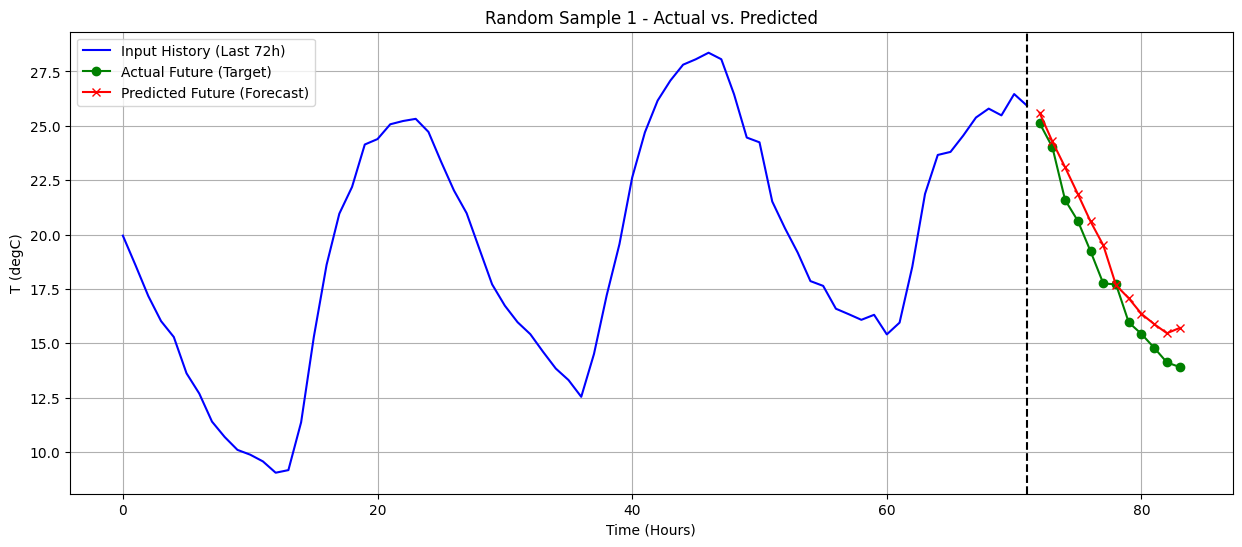

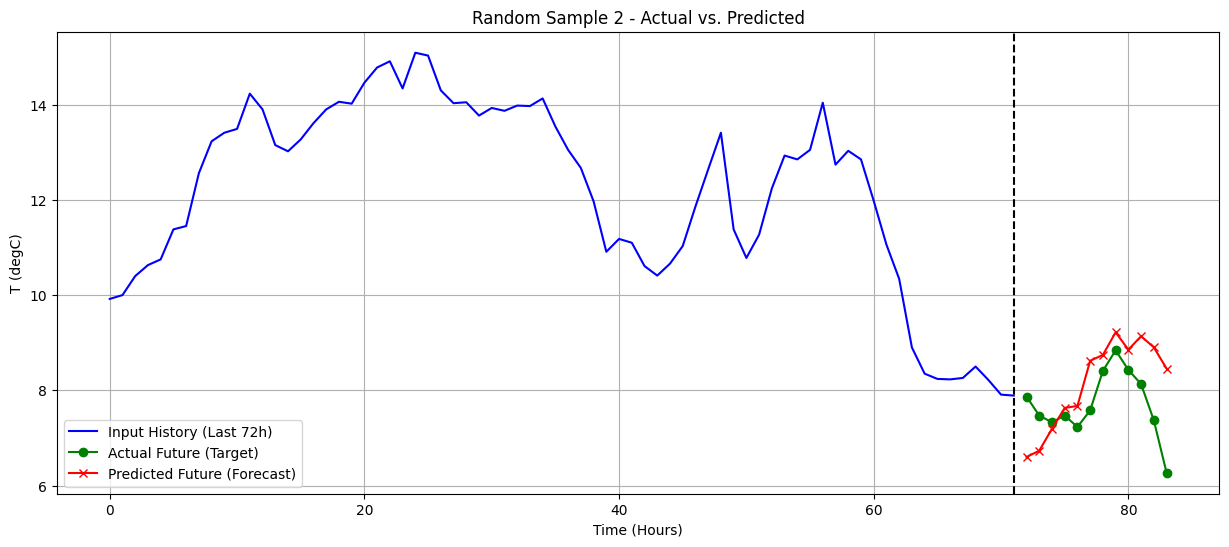

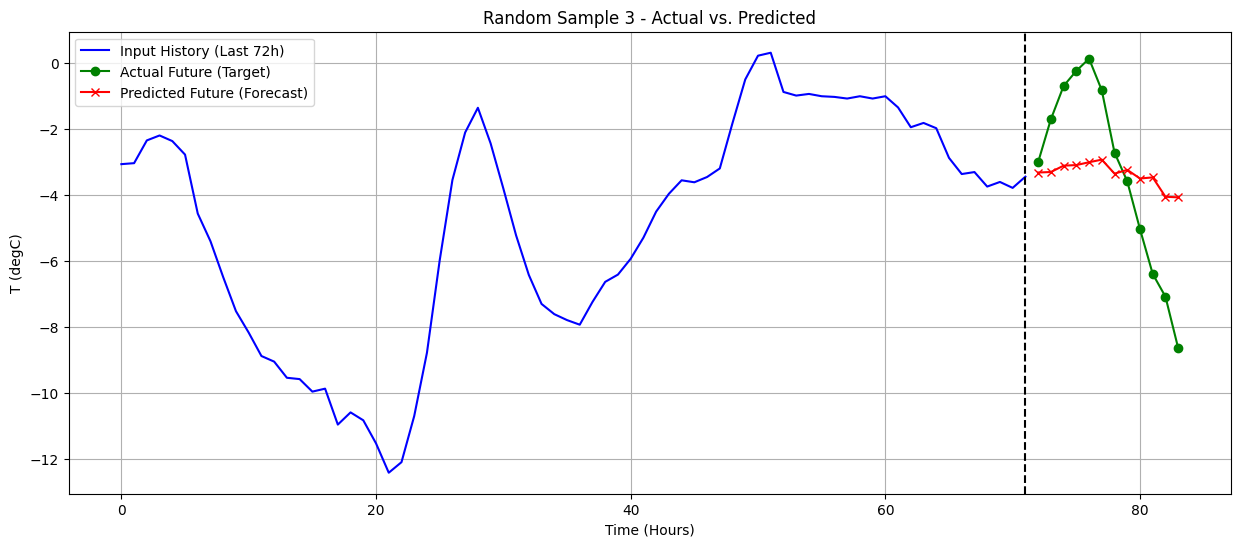



--- Section 8: Error Analysis (Best vs. Worst Case) ---
Best prediction MAE:  0.0141
Worst prediction MAE: 0.9838
Plotting Best Case Forecast...


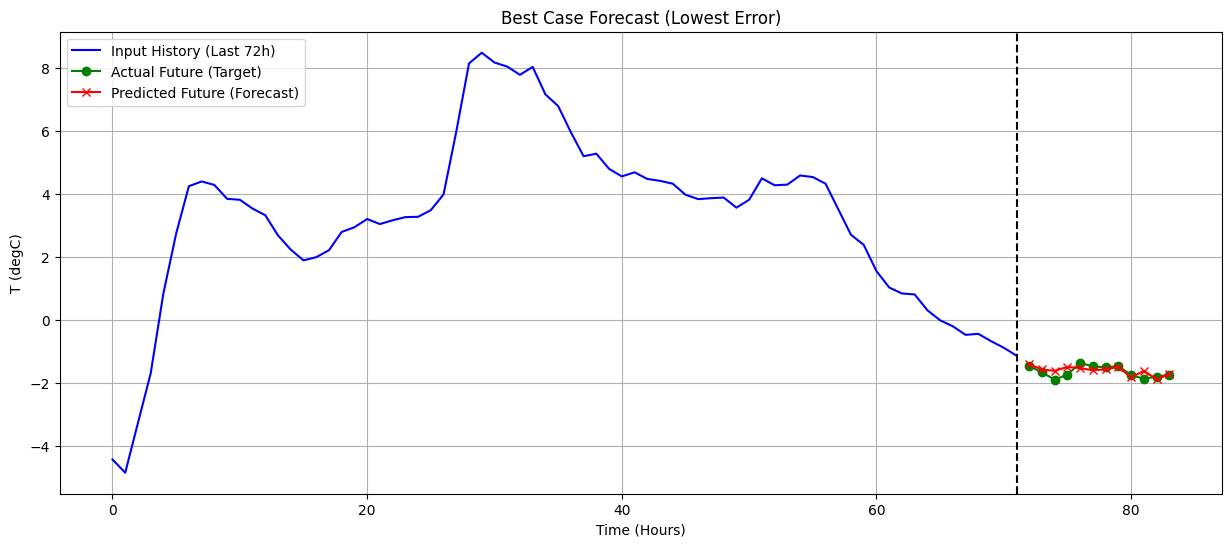

Plotting Worst Case Forecast...


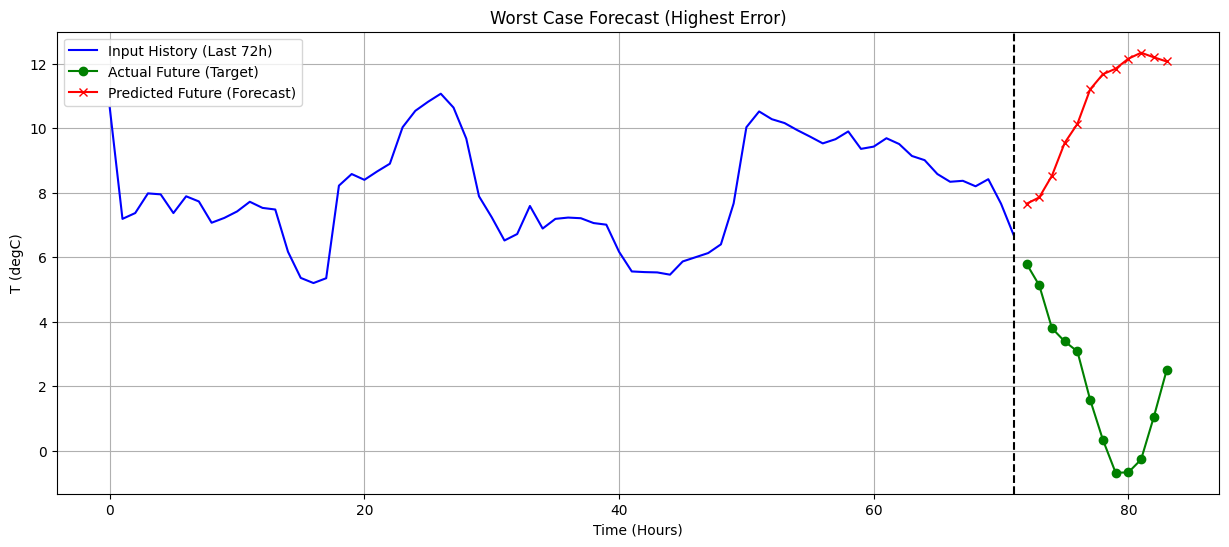

Error analysis complete. This shows where the model struggles (e.g., sudden changes).


--- Section 9: Save Final Model ---
Model weights saved successfully to: transformer_forecasting/transformer_forecaster.weights.h5

--- PROJECT COMPLETE ---


In [5]:
# ==============================================================================
# SECTION 1: IMPORTS AND SETUP
# ==============================================================================
print("--- Section 1: Setup and Imports ---")
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile

print(f"TensorFlow Version: {tf.__version__}")
print("Imports complete.")
print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 2: CONSTANTS AND DATA LOADING
# ==============================================================================
print("--- Section 2: Constants and Data Loading ---")

# --- Model & Data Constants ---
# We will use 72 hours (3 days) of hourly data
INPUT_WINDOW_SIZE = 72
# We will predict the next 12 hours
OUTPUT_WINDOW_SIZE = 12
# How many steps to shift the window over
SHIFT = 1

# Batch size
BATCH_SIZE = 128
# Training epochs (you can use 20-30)
EPOCHS = 20

# Features from the Jena dataset to use
# We'll predict 'T (degC)' (Temperature), so it MUST be the first one.
SELECTED_FEATURES = [
    'T (degC)',
    'p (mbar)',
    'rh (%)',
    'wv (m/s)',
    'max. wv (m/s)',
    'wd (deg)'
]
TARGET_FEATURE_NAME = 'T (degC)' # The feature we want to predict

# --- Load Dataset via Manual Download ---
print("Downloading and extracting Jena Climate dataset...")
data_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = tf.keras.utils.get_file(origin=data_url, fname="jena_climate_2009_2016.csv.zip", extract=False)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
csv_path = "jena_climate_2009_2016.csv"

# --- Load with Pandas ---
print("Loading data with Pandas...")
df = pd.read_csv(csv_path)

# --- Sub-sample Data to be Hourly ---
df = df[5::6] # Take every 6th record for 1-hour intervals
print(f"Total hourly records: {len(df)}")

# --- Select Features ---
df = df[SELECTED_FEATURES]

# --- Convert to NumPy for processing ---
print("Converting dataset to NumPy...")
data_np = df.values.astype(np.float32)
print(f"Data shape (records, features): {data_np.shape}")

# Find the index of our target feature
TARGET_FEATURE_IDX = SELECTED_FEATURES.index(TARGET_FEATURE_NAME)

print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 3: PREPROCESSING & WINDOWING
# ==============================================================================
print("--- Section 3: Preprocessing & Windowing ---")

# --- 1. Train/Val/Test Split (No Shuffling!) ---
n = len(data_np)
train_data = data_np[0:int(n*0.7)]
val_data = data_np[int(n*0.7):int(n*0.85)]
test_data = data_np[int(n*0.85):]

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")

# --- 2. Normalization ---
train_mean = train_data.mean(axis=0)
train_std = train_data.std(axis=0)

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# --- 3. Create Windowing Function ---
def create_windowed_dataset(data, input_width, output_width, shift, target_feature_idx):
    inputs = []
    targets = []
    total_size = len(data)
    window_size = input_width + output_width

    for i in range(0, total_size - window_size + 1, shift):
        input_slice = data[i : i + input_width]
        inputs.append(input_slice)

        target_slice = data[i + input_width : i + input_width + output_width]
        targets.append(target_slice[:, target_feature_idx])

    return np.array(inputs), np.array(targets)

# --- 4. Create Windowed Datasets ---
print("Creating windowed datasets...")
X_train, y_train = create_windowed_dataset(
    train_data, INPUT_WINDOW_SIZE, OUTPUT_WINDOW_SIZE, SHIFT, TARGET_FEATURE_IDX
)
X_val, y_val = create_windowed_dataset(
    val_data, INPUT_WINDOW_SIZE, OUTPUT_WINDOW_SIZE, SHIFT, TARGET_FEATURE_IDX
)
X_test, y_test = create_windowed_dataset(
    test_data, INPUT_WINDOW_SIZE, OUTPUT_WINDOW_SIZE, SHIFT, TARGET_FEATURE_IDX
)

print(f"Train inputs shape: {X_train.shape} (Samples, InputWindow, Features)")
print(f"Train targets shape: {y_train.shape} (Samples, OutputWindow)")
print(f"Validation inputs shape: {X_val.shape}")
print(f"Test inputs shape: {X_test.shape}")

# --- 5. Create tf.data Pipelines ---
def build_pipeline(X, y, batch_size, shuffle=True):
    pipeline = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        pipeline = pipeline.shuffle(10000, reshuffle_each_iteration=True)
    pipeline = pipeline.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return pipeline

train_pipeline = build_pipeline(X_train, y_train, BATCH_SIZE)
val_pipeline = build_pipeline(X_val, y_val, BATCH_SIZE)
# We don't shuffle the test pipeline for evaluation
test_pipeline = build_pipeline(X_test, y_test, BATCH_SIZE, shuffle=False)

print("tf.data pipelines built successfully.")
print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 4 (NEW): BASELINE LSTM MODEL
# ==============================================================================
print("--- Section 4: Training Baseline LSTM Model ---")
# This provides a crucial point of comparison for our Transformer.

def build_lstm_model():
    model = keras.Sequential([
        layers.Input(shape=(INPUT_WINDOW_SIZE, len(SELECTED_FEATURES))),
        layers.LSTM(32, return_sequences=False), # return_sequences=False because we only need the final output
        layers.Dense(OUTPUT_WINDOW_SIZE, activation="linear")
    ])
    return model

# --- Train the LSTM Baseline ---
lstm_model = build_lstm_model()
lstm_model.compile(
    loss="mae",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3) # LSTMs can often use a higher LR
)
lstm_model.summary()

print("Training LSTM baseline...")
lstm_history = lstm_model.fit(
    train_pipeline,
    epochs=10, # 10 epochs is usually enough for a simple LSTM to converge
    validation_data=val_pipeline,
    verbose=1
)

# --- Get Baseline MAE ---
print("Evaluating LSTM baseline on test set...")
baseline_test_loss = lstm_model.evaluate(test_pipeline, verbose=0)
print(f"Baseline LSTM Test MAE: {baseline_test_loss:.4f}")

print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 5: TRANSFORMER MODEL ARCHITECTURE
# ==============================================================================
print("--- Section 5: Transformer Model Architecture ---")

# --- 1. Positional Encoding Layer ---
def get_positional_encoding(seq_len, d_model):
    positions = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pos_enc = np.zeros((seq_len, d_model))
    pos_enc[:, 0::2] = np.sin(positions * div_term)
    pos_enc[:, 1::2] = np.cos(positions * div_term)
    return tf.constant(pos_enc[np.newaxis, ...], dtype=tf.float32)

class PositionalEmbedding(layers.Layer):
    def __init__(self, seq_len, d_model):
        super().__init__()
        self.d_model = d_model
        self.dense = layers.Dense(d_model, activation=None)
        self.pos_encoding = get_positional_encoding(seq_len, d_model)

    def call(self, x):
        x = self.dense(x)
        return x + self.pos_encoding

# --- 2. Transformer Encoder Block (Custom) ---
class TransformerEncoderBlock(layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.mha = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = keras.Sequential([
            layers.Dense(dff, activation="relu"),
            layers.Dense(d_model)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, x, training=False):
        attn_output = self.mha(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

# --- 3. Build the Full Transformer Model ---
def build_transformer_model(
    input_shape, output_shape, d_model, num_heads, dff,
    num_transformer_blocks, dropout_rate=0.1
):
    inputs = layers.Input(shape=input_shape)
    seq_len = input_shape[0]
    x = PositionalEmbedding(seq_len, d_model)(inputs)
    x = layers.Dropout(dropout_rate)(x)

    for _ in range(num_transformer_blocks):
        x = TransformerEncoderBlock(d_model, num_heads, dff, dropout_rate)(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(output_shape, activation="linear")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

# --- Instantiate the Model ---
D_MODEL = 64     # Model dimension
NUM_HEADS = 4    # Number of attention heads
DFF = 128        # Feed-forward network dimension
NUM_BLOCKS = 2   # Number of Transformer blocks

transformer_model = build_transformer_model(
    input_shape=(INPUT_WINDOW_SIZE, len(SELECTED_FEATURES)),
    output_shape=OUTPUT_WINDOW_SIZE,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dff=DFF,
    num_transformer_blocks=NUM_BLOCKS
)
transformer_model.summary()
print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 6: TRANSFORMER TRAINING
# ==============================================================================
print("--- Section 6: Training Transformer Model ---")

# --- Compile the Model ---
transformer_model.compile(
    loss="mae",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)

# --- Callbacks ---
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_transformer_model.weights.h5",
    save_best_only=True,
    monitor="val_loss",
    mode="min",
    save_weights_only=True,
    verbose=1
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5, # Stop after 5 epochs of no improvement
    mode="min",
    restore_best_weights=True
)

# --- Run the Training ---
print("Starting training...")
history = transformer_model.fit(
    train_pipeline,
    epochs=EPOCHS,
    validation_data=val_pipeline,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

print("Training complete.")
# The model automatically has the best weights due to 'restore_best_weights=True'

# --- Final Evaluation vs. Baseline ---
print("Evaluating Transformer on test set...")
transformer_test_loss = transformer_model.evaluate(test_pipeline, verbose=0)
print(f"   Baseline LSTM Test MAE: {baseline_test_loss:.4f}")
print(f"Transformer Model Test MAE: {transformer_test_loss:.4f}")
improvement = (baseline_test_loss - transformer_test_loss) / baseline_test_loss * 100
print(f"      Improvement over LSTM: {improvement:.2f}%")

print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 7: VISUALIZATION (UPGRADED) - 3 RANDOM SAMPLES
# ==============================================================================
print("--- Section 7: Visualization (3 Random Samples) ---")

# --- 1. Plot Training History (The "Proof") ---
print("Plotting training history...")
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.title('Transformer Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Absolute Error)')
plt.legend()
plt.savefig('transformer_loss_curves.png')
plt.show()

# --- 2. Create Reusable Plotting Function ---
def plot_forecast(
    input_history, actual_future, predicted_future,
    target_mean, target_std, title
):
    """
    Creates the 'Actual vs. Predicted' plot.
    De-normalizes the data for easy interpretation.
    """

    # --- De-normalize the data for plotting ---
    input_history_temp = (input_history[:, TARGET_FEATURE_IDX] * target_std) + target_mean
    actual_future_temp = (actual_future * target_std) + target_mean
    predicted_future_temp = (predicted_future * target_std) + target_mean

    # --- Create the Plot ---
    plt.figure(figsize=(15, 6))

    history_indices = np.arange(0, INPUT_WINDOW_SIZE)
    future_indices = np.arange(INPUT_WINDOW_SIZE, INPUT_WINDOW_SIZE + OUTPUT_WINDOW_SIZE)

    # Plot Input History (last 72 hours)
    plt.plot(history_indices, input_history_temp, 'b-', label='Input History (Last 72h)')

    # Plot Actual Future (next 12 hours)
    plt.plot(future_indices, actual_future_temp, 'g-', label='Actual Future (Target)', marker='o')

    # Plot Predicted Future (next 12 hours)
    plt.plot(future_indices, predicted_future_temp, 'r-', label='Predicted Future (Forecast)', marker='x')

    plt.title(title)
    plt.xlabel('Time (Hours)')
    plt.ylabel(f'{TARGET_FEATURE_NAME}')
    plt.legend()
    plt.axvline(x=INPUT_WINDOW_SIZE-1, color='k', linestyle='--', label='Forecast Start')
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    plt.show()

# --- 3. Get All Predictions for Robust Visualization ---
# We use the unbatched, unshuffled X_test data for this
print("Generating 3 random forecast plots to show robustness...")
all_predictions = transformer_model.predict(X_test)

# --- De-normalization constants ---
target_mean = train_mean[TARGET_FEATURE_IDX]
target_std = train_std[TARGET_FEATURE_IDX]

# --- Plot 3 Random Samples ---
num_samples_to_plot = 3
random_indices = np.random.randint(0, len(X_test), num_samples_to_plot)

for i, idx in enumerate(random_indices):
    plot_forecast(
        input_history=X_test[idx],
        actual_future=y_test[idx],
        predicted_future=all_predictions[idx],
        target_mean=target_mean,
        target_std=target_std,
        title=f"Random Sample {i+1} - Actual vs. Predicted"
    )

print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 8 (NEW): ERROR ANALYSIS (BEST VS. WORST CASE)
# ==============================================================================
print("--- Section 8: Error Analysis (Best vs. Worst Case) ---")
# This shows critical thinking and an understanding of model limitations.

# --- 1. Calculate MAE for every sample in the test set ---
# (all_predictions, y_test)
sample_maes = np.mean(np.abs(all_predictions - y_test), axis=1) # Shape: (num_test_samples,)

# --- 2. Find Best and Worst Prediction Indices ---
best_pred_idx = np.argmin(sample_maes)
worst_pred_idx = np.argmax(sample_maes)

print(f"Best prediction MAE:  {sample_maes[best_pred_idx]:.4f}")
print(f"Worst prediction MAE: {sample_maes[worst_pred_idx]:.4f}")

# --- 3. Plot the Best Case ---
print("Plotting Best Case Forecast...")
plot_forecast(
    input_history=X_test[best_pred_idx],
    actual_future=y_test[best_pred_idx],
    predicted_future=all_predictions[best_pred_idx],
    target_mean=target_mean,
    target_std=target_std,
    title="Best Case Forecast (Lowest Error)"
)

# --- 4. Plot the Worst Case ---
print("Plotting Worst Case Forecast...")
plot_forecast(
    input_history=X_test[worst_pred_idx],
    actual_future=y_test[worst_pred_idx],
    predicted_future=all_predictions[worst_pred_idx],
    target_mean=target_mean,
    target_std=target_std,
    title="Worst Case Forecast (Highest Error)"
)
print("Error analysis complete. This shows where the model struggles (e.g., sudden changes).")
print("\n" + "="*80 + "\n")


# ==============================================================================
# SECTION 9: SAVE FINAL MODEL
# ==============================================================================
print("--- Section 9: Save Final Model ---")
# The model already has its best weights from the EarlyStopping callback
PROJECT_DIR = "transformer_forecasting"
os.makedirs(PROJECT_DIR, exist_ok=True)

MODEL_SAVE_PATH = os.path.join(PROJECT_DIR, "transformer_forecaster.weights.h5")
# We already saved the best weights via callback, but we save again
# just in case and to have a final file.
transformer_model.save_weights(MODEL_SAVE_PATH)

print(f"Model weights saved successfully to: {MODEL_SAVE_PATH}")
print("\n--- PROJECT COMPLETE ---")